# Optimization of the XGBoost algorithm

In [ ]:
run init.ipynb

# Cohort description 

In [3]:
df =  pd.read_csv(AUTISM_DATA_PATH)

data = Dataset(df=df, 
               missing_data_handling='imputation',
               imputation_method='constant',
               sampling_method='without',
               scenario = 'multimodal_2023_regular_ddld', 
               features_name = deepcopy(DEFAULT_PREDICTORS_BY_TYPES['All']),
               scale_data=False, 
               use_missing_indicator_variables=USE_MISSING_INDICATOR_PREDICTORS,
               verbosity=1, 
               proportion_train=1)

data.df = data.df.replace({'primary_education': {0: 'Unknown',
                                       1: 'Without High School Diploma',
                                       2: 'Without High School Diploma',
                                       9: 'Without High School Diploma',
                                       3: 'High School Diploma or Equivalent',
                                       4: 'Some College Education',
                                       5: '4-Year College Degree or More',
                                       6: '4-Year College Degree or More',
                                       7: '4-Year College Degree or More',
                                       8: '4-Year College Degree or More'}})


display(data.df.groupby('study')[['id']].count())

,id
study,
ARC,48
P1,426
P2,1


In [6]:
data.df[data.df['study'] == 'P2']

,id,diagnosis,language,app_version,subject,administration,features_extracted,face_tracking,age,timestamp,date,time,study,stimuli_version,sex,ethnicity,race,primary_education,asd_yn,mullen_el,mullen_fm,mullen_rl,mullen_vr,mullen_elc_std,ados_total,ados_rrb,ados_sa,srs_total_tscore,srs_social_awareness_tscore,srs_social_motivation_tscore,cbcl_scaleIV_score,cbcl_asd_score,mchat_total,mchat_final,mchat_result,BB_gaze_percent_right,BB_gaze_silhouette_score,S_gaze_percent_right,S_gaze_silhouette_score,FP_gaze_speech_correlation,FP_gaze_silhouette_score,proportion_of_name_call_responses,average_response_to_name_delay,valid_name_calls,FB_postural_sway,FB_postural_sway_derivative,DIGC_postural_sway,DIGC_postural_sway_derivative,DIGRRL_postural_sway,DIGRRL_postural_sway_derivative,ST_postural_sway,ST_postural_sway_derivative,MP_postural_sway,MP_postural_sway_derivative,PB_postural_sway,PB_postural_sway_derivative,BB_postural_sway,BB_postural_sway_derivative,RT_postural_sway,RT_postural_sway_derivative,MML_postural_sway,MML_postural_sway_derivative,PWB_postural_sway,PWB_postural_sway_derivative,FP_postural_sway,FP_postural_sway_derivative,number_of_touches,average_length,std_length,average_error,std_error,number_of_target,pop_rate,average_touch_duration,std_touch_duration,average_delay_to_pop,std_delay_to_pop,repeat_percentage,repeat_percentage_naive,double_tap,mean_velocity,std_velocity,average_force_applied,std_force_applied,average_accuracy_variation,accuracy_consistency,average_touches_per_target,std_touches_per_target,average_time_spent,std_time_spent,exploratory_percentage,validity_available,completed,StateOfTheChild,SiblingsInTheRoom,ShotsVaccines,Distractions,FamilyMemberDistract,PetDistract,PetNoiseDistract,DoorbellPhoneDistract,TVOnDistract,OtherDistract,SittingUp,Hungry,Diaper,AppTeamComment,Comments,path,FB_head_movement_complexity,DIGC_head_movement_complexity,DIGRRL_head_movement_complexity,ST_head_movement_complexity,MP_head_movement_complexity,PB_head_movement_complexity,BB_head_movement_complexity,RT_head_movement_complexity,MML_head_movement_complexity,PWB_head_movement_complexity,FP_head_movement_complexity,FB_facing_forward,DIGC_facing_forward,DIGRRL_facing_forward,ST_facing_forward,MP_facing_forward,PB_facing_forward,BB_facing_forward,RT_facing_forward,MML_facing_forward,PWB_facing_forward,FP_facing_forward,FB_eyebrows_complexity,DIGC_eyebrows_complexity,DIGRRL_eyebrows_complexity,ST_eyebrows_complexity,MP_eyebrows_complexity,PB_eyebrows_complexity,BB_eyebrows_complexity,RT_eyebrows_complexity,MML_eyebrows_complexity,PWB_eyebrows_complexity,FP_eyebrows_complexity,FB_mouth_complexity,DIGC_mouth_complexity,DIGRRL_mouth_complexity,ST_mouth_complexity,MP_mouth_complexity,PB_mouth_complexity,BB_mouth_complexity,RT_mouth_complexity,MML_mouth_complexity,PWB_mouth_complexity,FP_mouth_complexity,remote,chart_date,chart_age,asd_dx,asd_dx_conserv,ddld_dx,adhd_dx,id_dx,neurodev_dx,motor_dx,disruptive_dx,anxiety_dx,mood_dx,administration_number,S_postural_sway,NS_postural_sway,S_postural_sway_derivative,NS_postural_sway_derivative,gaze_silhouette_score,inv_S_gaze_percent_right,mean_gaze_percent_right,S_postural_sway_complexity,NS_postural_sway_complexity,S_facing_forward,NS_facing_forward,S_eyebrows_complexity,NS_eyebrows_complexity,S_mouth_complexity,NS_mouth_complexity,S_postural_sway_conf,NS_postural_sway_conf,S_postural_sway_derivative_conf,NS_postural_sway_derivative_conf,gaze_silhouette_score_conf,mean_gaze_percent_right_conf,FP_gaze_speech_correlation_conf,S_facing_forward_conf,NS_facing_forward_conf,S_eyebrows_complexity_conf,NS_eyebrows_complexity_conf,S_mouth_complexity_conf,NS_mouth_complexity_conf,S_postural_sway_complexity_conf,NS_postural_sway_complexity_conf,RTN_conf,touch_conf,Z_mean_gaze_percent_right,Z_gaze_silhouette_score,Z_FP_gaze_speech_correlation,Z_proportion_of_name_call_responses,Z_average_response_to_name_delay,Z_S_postural_sway,Z_NS_postural_sway,Z_S_postural_sway_derivative,Z_NS_postural_sway_derivati

In [7]:
data.df[DEMOGRAPHIC_COLUMNS]

,age,sex,ethnicity,race,primary_education
0,24.262295,1.0,0.0,0.0,4-Year College Degree or More
1,30.754098,0.0,0.0,0.0,4-Year College Degree or More
2,25.245902,0.0,0.0,0.0,4-Year College Degree or More
3,29.901639,0.0,0.0,1.0,4-Year College Degree or More
4,24.721311,1.0,1.0,0.0,4-Year College Degree or More
...,...,...,...,...,...
470,18.098361,1.0,0.0,0.0,4-Year College Degree or More
471,18.065574,1.0,1.0,0.0,4-Year College Degree or More
472,31.180328,0.0,0.0,0.0,4-Year College Degree or More
473,22.032787,0.0,0.0,2.0,4-Year College Degree or More


In [14]:
from utils import select
select(select(df, 'diagnosis', 0), 'mchat_result', 1)

,id,diagnosis,language,app_version,subject,administration,features_extracted,face_tracking,age,timestamp,date,time,study,stimuli_version,sex,ethnicity,race,primary_education,asd_yn,mullen_el,mullen_fm,mullen_rl,mullen_vr,mullen_elc_std,ados_total,ados_rrb,ados_sa,srs_total_tscore,srs_social_awareness_tscore,srs_social_motivation_tscore,cbcl_scaleIV_score,cbcl_asd_score,mchat_total,mchat_final,mchat_result,BB_gaze_percent_right,BB_gaze_silhouette_score,S_gaze_percent_right,S_gaze_silhouette_score,FP_gaze_speech_correlation,FP_gaze_silhouette_score,proportion_of_name_call_responses,average_response_to_name_delay,valid_name_calls,FB_postural_sway,FB_postural_sway_derivative,DIGC_postural_sway,DIGC_postural_sway_derivative,DIGRRL_postural_sway,DIGRRL_postural_sway_derivative,ST_postural_sway,ST_postural_sway_derivative,MP_postural_sway,MP_postural_sway_derivative,PB_postural_sway,PB_postural_sway_derivative,BB_postural_sway,BB_postural_sway_derivative,RT_postural_sway,RT_postural_sway_derivative,MML_postural_sway,MML_postural_sway_derivative,PWB_postural_sway,PWB_postural_sway_derivative,FP_postural_sway,FP_postural_sway_derivative,number_of_touches,average_length,std_length,average_error,std_error,number_of_target,pop_rate,average_touch_duration,std_touch_duration,average_delay_to_pop,std_delay_to_pop,repeat_percentage,repeat_percentage_naive,double_tap,mean_velocity,std_velocity,average_force_applied,std_force_applied,average_accuracy_variation,accuracy_consistency,average_touches_per_target,std_touches_per_target,average_time_spent,std_time_spent,exploratory_percentage,validity_available,completed,StateOfTheChild,SiblingsInTheRoom,ShotsVaccines,Distractions,FamilyMemberDistract,PetDistract,PetNoiseDistract,DoorbellPhoneDistract,TVOnDistract,OtherDistract,SittingUp,Hungry,Diaper,AppTeamComment,Comments,path,FB_head_movement_complexity,DIGC_head_movement_complexity,DIGRRL_head_movement_complexity,ST_head_movement_complexity,MP_head_movement_complexity,PB_head_movement_complexity,BB_head_movement_complexity,RT_head_movement_complexity,MML_head_movement_complexity,PWB_head_movement_complexity,FP_head_movement_complexity,FB_facing_forward,DIGC_facing_forward,DIGRRL_facing_forward,ST_facing_forward,MP_facing_forward,PB_facing_forward,BB_facing_forward,RT_facing_forward,MML_facing_forward,PWB_facing_forward,FP_facing_forward,FB_eyebrows_complexity,DIGC_eyebrows_complexity,DIGRRL_eyebrows_complexity,ST_eyebrows_complexity,MP_eyebrows_complexity,PB_eyebrows_complexity,BB_eyebrows_complexity,RT_eyebrows_complexity,MML_eyebrows_complexity,PWB_eyebrows_complexity,FP_eyebrows_complexity,FB_mouth_complexity,DIGC_mouth_complexity,DIGRRL_mouth_complexity,ST_mouth_complexity,MP_mouth_complexity,PB_mouth_complexity,BB_mouth_complexity,RT_mouth_complexity,MML_mouth_complexity,PWB_mouth_complexity,FP_mouth_complexity,remote,chart_date,chart_age,asd_dx,asd_dx_conserv,ddld_dx,adhd_dx,id_dx,neurodev_dx,motor_dx,disruptive_dx,anxiety_dx,mood_dx,administration_number,S_postural_sway,NS_postural_sway,S_postural_sway_derivative,NS_postural_sway_derivative,gaze_silhouette_score,inv_S_gaze_percent_right,mean_gaze_percent_right,S_postural_sway_complexity,NS_postural_sway_complexity,S_facing_forward,NS_facing_forward,S_eyebrows_complexity,NS_eyebrows_complexity,S_mouth_complexity,NS_mouth_complexity,S_postural_sway_conf,NS_postural_sway_conf,S_postural_sway_derivative_conf,NS_postural_sway_derivative_conf,gaze_silhouette_score_conf,mean_gaze_percent_right_conf,FP_gaze_speech_correlation_conf,S_facing_forward_conf,NS_facing_forward_conf,S_eyebrows_complexity_conf,NS_eyebrows_complexity_conf,S_mouth_complexity_conf,NS_mouth_complexity_conf,S_postural_sway_complexity_conf,NS_postural_sway_complexity_conf,RTN_conf,touch_conf,Z_mean_gaze_percent_right,Z_gaze_silhouette_score,Z_FP_gaze_speech_correlation,Z_proportion_of_name_call_responses,Z_average_response_to_name_delay,Z_S_postural_sway,Z_NS_postural_sway,Z_S_postural_sway_derivative,Z_NS_postural_sway_derivati

In [15]:
def print_group_distribution(df, attribute, name, attribute_type):   
    df = df.replace({'primary_education': {0: 'Unknown',
                                       1: 'Without High School Diploma',
                                       2: 'Without High School Diploma',
                                       9: 'Without High School Diploma',
                                       3: 'High School Diploma or Equivalent',
                                       4: 'Some College Education',
                                       5: '4-Year College Degree or More',
                                       6: '4-Year College Degree or More',
                                       7: '4-Year College Degree or More',
                                       8: '4-Year College Degree or More'}})
    
    df = df.replace({'race': {0: 'White',
                                       1: 'Black/African American',
                                       2: 'More than one race',
                                       1: 'Without',
                                       1: 'Without',
                                       1: 'Without',
                                       9: 'Without High School Diploma',
                                       3: 'High School Diploma or Equivalent',
                                       4: 'Some College Education',
                                       5: '4-Year College Degree or More',
                                       6: '4-Year College Degree or More',
                                       7: '4-Year College Degree or More',
                                       8: '4-Year College Degree or More'}})
    
    print("\n#### {} ####".format(name))

    if attribute_type.lower() == 'numerical':
        df_mean = df[attribute].mean()
        df_std = df[attribute].std()
        df_missing =  df[attribute].isna().sum()



        print(df_mean, df_std, df_missing, "{}".format(df_missing/len(df)))

    elif attribute_type.lower() == 'categorical':
        df_freq = df[attribute].value_counts(dropna=False).rename('frequency')
        df_perc = df[attribute].value_counts(normalize=True, dropna=False).rename('percentage') * 100
        df_missing =  df[attribute].isna().sum()
        print(pd.concat([df_freq, df_perc], axis=1), df_missing)

    else:
        print('Warning, attribute type not recognized.')

attributes_list = ['age',  'sex', 'race', 'ethnicity', 'primary_education', 'mchat_result', 
                   'ados_total' , 'ados_rrb' , 'ados_sa' , 'mullen_elc_std', 'mullen_el',
                   'mullen_rl', 'mullen_fm', 'mullen_vr']
attributes_names = ['Age','Sex', 'Race', 'Ethnicity', 'Primary Education', 'MCHAT R/F',
                    'ADOS-2 Calibrated Severity Score','ADOS-2 RRB', 'ADOS-2 SA',  'Mullen Scales of Early Learning', 'Expressive Language T-Score',
                    'Receptive Language T-Score', 'Fine Motor T-Score', 'Visual Reception T-Score']
attributes_type = ['Numerical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical',
                   'Numerical', 'Numerical', 'Numerical', 'Numerical', 'Numerical','Numerical', 'Numerical', 'Numerical', 'Categorical','Numerical', 'Numerical', 'Numerical',
                  'Numerical', 'Numerical', 'Numerical', 'Numerical', 'Numerical']

#df = results_young[results_young['diagnosis']!='DDLD']
#df = df_results[df_results['diagnosis']!='DDLD']
df = data.df


for diagnosis in [0, 1, 2]:
    print("\n\n\n\nDIAGNOSIS: {}".format(diagnosis))
    for att, att_name, att_type in zip(attributes_list, attributes_names, attributes_type):
        print_group_distribution(df[df['diagnosis']==diagnosis], att, att_name, att_type)






DIAGNOSIS: 0

#### Age ####
20.414934026389442 3.013451645553562 0 0.0

#### Sex ####
     frequency  percentage
1.0        170   51.829268
0.0        158   48.170732 0

#### Race ####
                                frequency  percentage
White/Caucasian                       255   77.743902
More than one race                     32    9.756098
Black/African American                 28    8.536585
Other                                   6    1.829268
Asian                                   6    1.829268
American Indian/Alaskan Native          1    0.304878 0

#### Ethnicity ####
     frequency  percentage
0.0        306   93.292683
1.0         22    6.707317 0

#### Primary Education ####
                                   frequency  percentage
4-Year College Degree or More            281   85.670732
Some College Education                    32    9.756098
High School Diploma or Equivalent         12    3.658537
NaN                                        2    0.609756
Without High 

# Correlations between features 

In [ ]:
xgboost_hyperparameters = {'scale_pos_weight':True,#np.sum(data.y_train==0)/np.sum(data.y_train==1), 
                            'max_depth' : 3,
                            'learning_rate' : 0.15, 
                            'gamma': 0.1,
                            'n_estimators': 100,
                            'min_child_weight': 1,
                            'reg_lambda': 0.1}
    
    
use_weight = True
if use_weight:
    weighted_confidence_score = np.load(os.path.join(DATA_DIR, 'multimodal_paper', 'weight_multimodal.npy'))
else:
    weighted_confidence_score = None
    

df =  pd.read_csv(AUTISM_DATA_PATH)

data = Dataset(df=df, 
               missing_data_handling='imputation',
               imputation_method='constant',
               sampling_method='without',
               scenario = 'multimodal_2023_regular_ddld', 
               features_name = deepcopy(DEFAULT_PREDICTORS_BY_TYPES['All']),
               scale_data=False, 
               use_missing_indicator_variables=False,
               verbosity=1, 
               proportion_train=1)

exp = Experiments(data.dataset_name,
                  dataset=data, 
                  approach='xgboost', 
                  previous_experiment=None,        
                  debug=False, 
                  experiment_folder_name='15_December_final_regular_weighted_K50', 
                  model_hyperparameters=xgboost_hyperparameters,
                  experiment_name = 'Supreme',
                  verbosity=1, 
                  save_experiment=False)

exp.fit_predict(num_cv=10, sample_weight=None, random_state=47)
#exp.predictions_df['sample_weight'] = weighted_confidence_score
exp.plot()

In [38]:
import missingno as msno
df_X = exp.dataset.df[['age'] + data.features_name[:-4]]


def custom_spearmanr(x, y):
    from scipy.stats import spearmanr
    return spearmanr(x, y, nan_policy='omit').correlation

def custom_spearmanr_pvalue(x, y):
    from scipy.stats import spearmanr
    return spearmanr(x, y, nan_policy='omit').pvalue

# Computes feature correlation
df_corr = df_X.corr(method=custom_spearmanr)
df_corr.rename(columns=feature_name_mapping, index=feature_name_mapping, inplace=True)
df_corr.rename(columns={'age':'Age'}, index={'age':'Age'}, inplace=True)

df_p = df_X.corr(method=custom_spearmanr_pvalue)

labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.3, "W", "")))

labels_p = np.where(df_p>0.05, "",
                  np.where(df_p>0.01, "*",
                           np.where(df_p>0.001, "**", 
                                    np.where(df_p>0.0000000000000000000000001, "***",""))))





Index(['age', 'mean_gaze_percent_right', 'gaze_silhouette_score', 'FP_gaze_speech_correlation', 'proportion_of_name_call_responses', 'average_response_to_name_delay', 'S_postural_sway', 'NS_postural_sway', 'S_postural_sway_derivative', 'NS_postural_sway_derivative', 'S_postural_sway_complexity', 'NS_postural_sway_complexity', 'S_facing_forward', 'NS_facing_forward', 'S_eyebrows_complexity', 'NS_eyebrows_complexity', 'S_mouth_complexity', 'NS_mouth_complexity'], dtype='object')

In [24]:
label_final = np.zeros_like(labels_p)
for i in range(label_final.shape[0]):
    for j in range(label_final.shape[0]):
        label_final[i,j] = labels[i, j] + ' ' + labels_p[i, j]

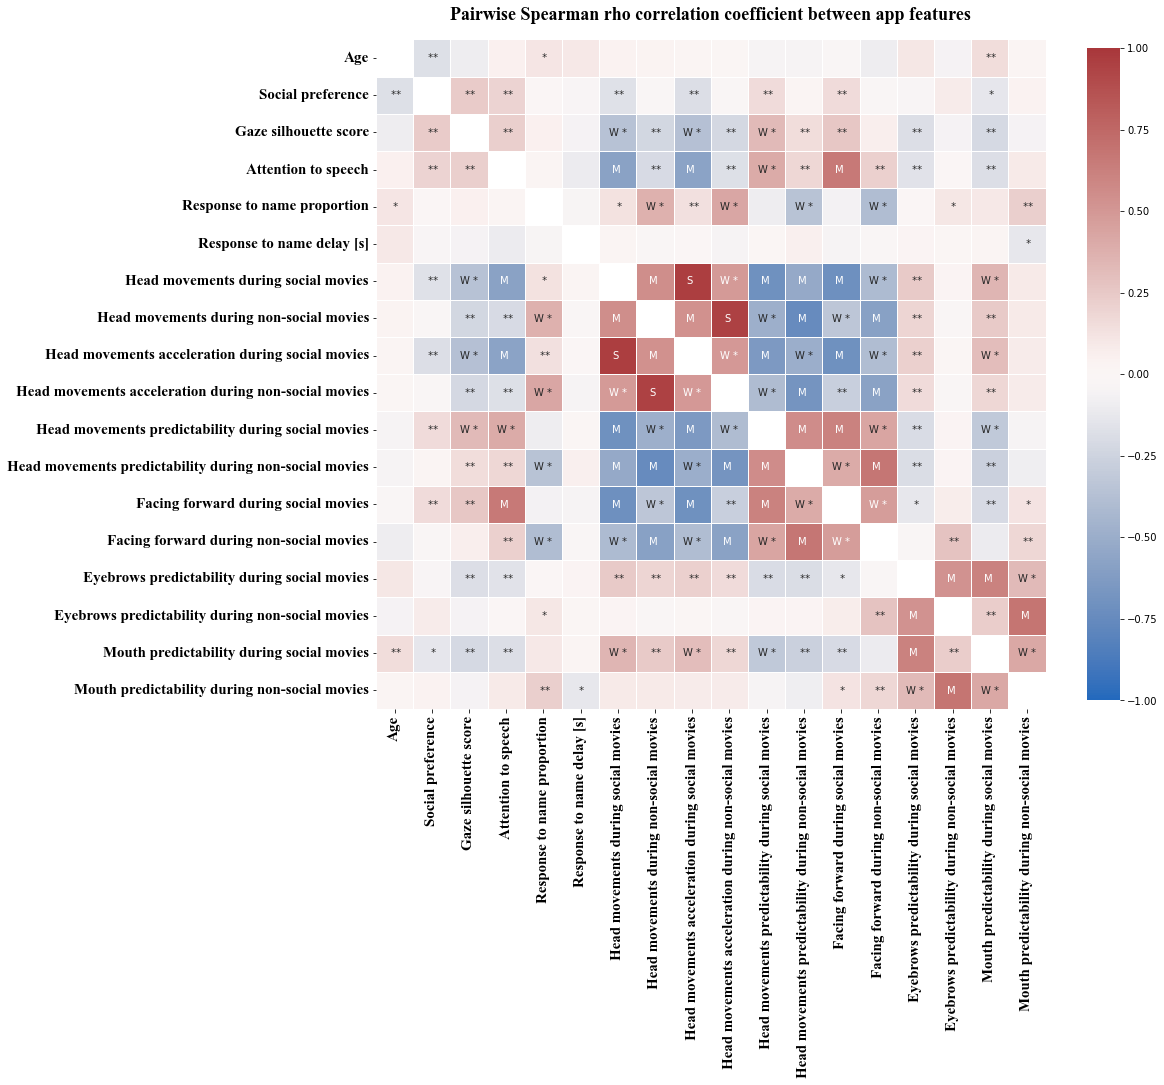

In [40]:
# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,vmin=-1, vmax=1,
            center=0, annot=label_final, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});
csfont = {'fontname':'Times New Roman'}
plt.gca().set_xticks(plt.gca().get_xticks(), df_corr.index, weight='bold', fontsize=15, **csfont)
plt.gca().set_yticks(plt.gca().get_yticks(), df_corr.index, weight='bold', fontsize=15, **csfont)
plt.title("Pairwise Spearman rho correlation coefficient between app features", weight='bold', y=1.02, fontsize=18, **csfont)

plt.savefig(os.path.join(DATA_DIR, 'figures', 'pairwise_spearman.png'), dpi=200, bbox_inches = 'tight')

,rate
age,0.000000
Head movements acceleration during non-social movies,0.000000
Head movements during non-social movies,0.000000
Response to name proportion,0.007958
Eyebrows predictability during non-social movies,0.010610
Facing forward during non-social movies,0.010610
Head movements predictability during non-social movies,0.010610
Mouth predictability during non-social movies,0.010610
Head movements during social movies,0.047745
Head movements acceleration during social movies,0.047745


In [4]:
df_X = exp.dataset.df[data.features_name[:-4]]


NameError: name 'exp' is not defined

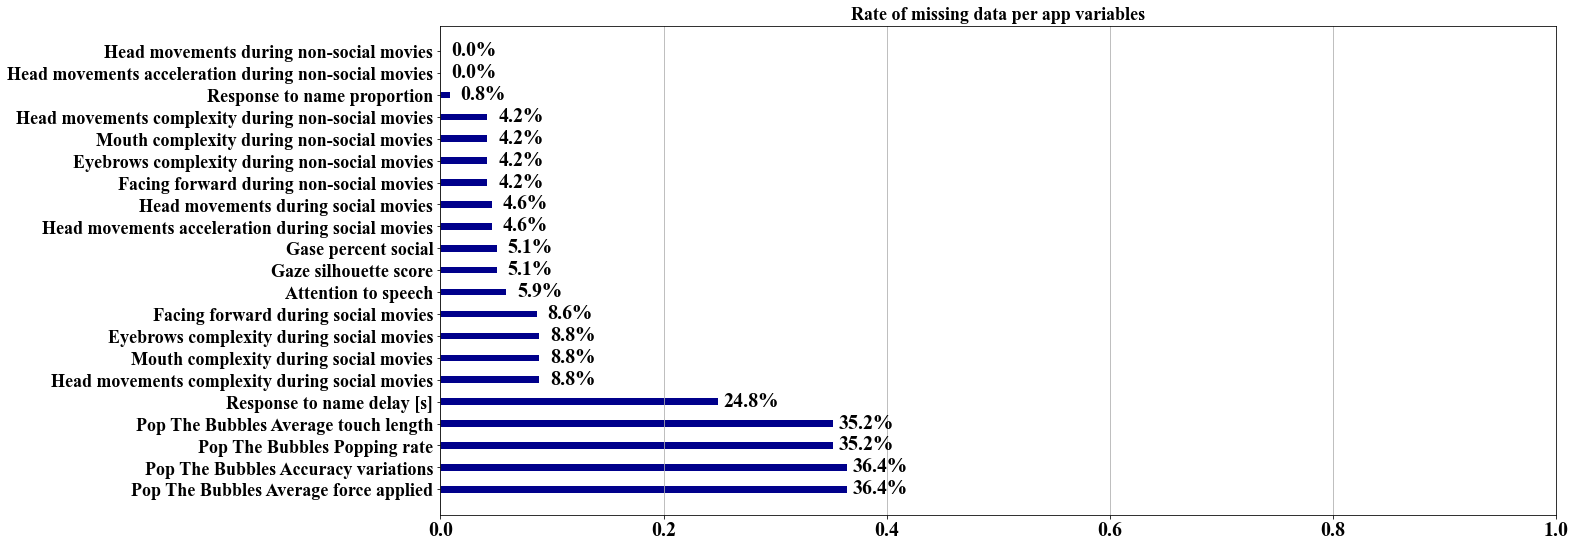

In [8]:
df_X = data.df[data.features_name[:-4]]
feature_name_mapping = {'S_facing_forward':"Facing forward during social movies", 
                 'NS_facing_forward':"Facing forward during non-social movies", 
                 'S_postural_sway': "Head movements during social movies", 
                 'NS_postural_sway': "Head movements during non-social movies", 
                 'S_postural_sway_complexity':  "Head movements complexity during social movies", 
                 'NS_postural_sway_complexity':  "Head movements complexity during non-social movies", 
                 
                 'mean_gaze_percent_right': "Gase percent social",
                 'FP_gaze_speech_correlation': "Attention to speech",
                 'gaze_silhouette_score': 'Gaze silhouette score',
                 
                 'average_response_to_name_delay': 'Response to name delay [s]',
                 'proportion_of_name_call_responses': 'Response to name proportion',
                 'S_eyebrows_complexity': 'Eyebrows complexity during social movies', 
                 'NS_eyebrows_complexity': 'Eyebrows complexity during non-social movies', 
                 'S_mouth_complexity': 'Mouth complexity during social movies', 
                 'NS_mouth_complexity': 'Mouth complexity during non-social movies', 
                 'pop_rate': 'Pop The Bubbles Popping rate', 
                 'std_error': 'Pop The Bubbles Accuracy variations', 
                 'average_force_applied':  'Pop The Bubbles Average force applied', 
                 'average_length':  'Pop The Bubbles Average touch length', 
                 'S_postural_sway_derivative': 'Head movements acceleration during social movies', 
                 'NS_postural_sway_derivative': 'Head movements acceleration during non-social movies'
                }

df_X.rename(columns=feature_name_mapping, index=feature_name_mapping, inplace=True)
df_X.rename(columns={'age':'Age'}, inplace=True)

df_X.isna().mean().sort_values()

df_missing = pd.DataFrame(df_X.isna().mean().sort_values(), columns=['rate'])

csfont = {'fontname':'Times New Roman'}
from matplotlib import rc
plt.rcParams["font.serif"] = "Times New Roman"
plt.figure(figsize=(20, 9))

y = len(df_missing)
left = 0
for i, row in df_missing.iterrows():

    plt.barh(y, row['rate'], height=0.3, color = 'darkblue')# if row['shap']>0 else 'left', color='red')
    pos_offset = 0.03
    plt.annotate("{:.1f}%".format(row['rate']*100),(row['rate']+pos_offset, y-0.2),ha="center", color = 'k', fontsize=20, weight='bold', **csfont)
    y-=1

plt.yticks(ticks = list(reversed(range(1,len(df_missing)+1))), labels = df_missing.index, weight='bold', fontsize=20, **csfont)
plt.xticks(weight='bold', fontsize=20, **csfont)
plt.xlim([0, 1])
plt.gca().xaxis.grid(True)  #plt.grid()
plt.gca().set_yticks(plt.gca().get_yticks(), df_missing.index, weight='bold', fontsize=18, **csfont)
plt.title("Rate of missing data per app variables", weight='bold', fontsize=18, **csfont)
#plt.title(title,weight="bold", fontsize=22, **csfont)
plt.savefig(os.path.join(ROOT_DIR, 'figures', 'missingness.png'), dpi=200, bbox_inches = 'tight')

# EHR Data verification of the diagnosis


In [195]:
df =  pd.read_csv(AUTISM_DATA_PATH)
df[df.diagnosis.isna()]

,id,diagnosis,language,app_version,subject,administration,features_extracted,face_tracking,age,timestamp,date,time,study,stimuli_version,sex,ethnicity,race,primary_education,asd_yn,mullen_el,mullen_fm,mullen_rl,mullen_vr,mullen_elc_std,ados_total,ados_rrb,ados_sa,srs_total_tscore,srs_social_awareness_tscore,srs_social_motivation_tscore,cbcl_scaleIV_score,cbcl_asd_score,mchat_total,mchat_final,mchat_result,BB_gaze_percent_right,BB_gaze_silhouette_score,S_gaze_percent_right,S_gaze_silhouette_score,FP_gaze_speech_correlation,FP_gaze_silhouette_score,proportion_of_name_call_responses,average_response_to_name_delay,valid_name_calls,FB_postural_sway,FB_postural_sway_derivative,DIGC_postural_sway,DIGC_postural_sway_derivative,DIGRRL_postural_sway,DIGRRL_postural_sway_derivative,ST_postural_sway,ST_postural_sway_derivative,MP_postural_sway,MP_postural_sway_derivative,PB_postural_sway,PB_postural_sway_derivative,BB_postural_sway,BB_postural_sway_derivative,RT_postural_sway,RT_postural_sway_derivative,MML_postural_sway,MML_postural_sway_derivative,PWB_postural_sway,PWB_postural_sway_derivative,FP_postural_sway,FP_postural_sway_derivative,number_of_touches,average_length,std_length,average_error,std_error,number_of_target,pop_rate,average_touch_duration,std_touch_duration,average_delay_to_pop,std_delay_to_pop,repeat_percentage,repeat_percentage_naive,double_tap,mean_velocity,std_velocity,average_force_applied,std_force_applied,average_accuracy_variation,accuracy_consistency,average_touches_per_target,std_touches_per_target,average_time_spent,std_time_spent,exploratory_percentage,validity_available,completed,StateOfTheChild,SiblingsInTheRoom,ShotsVaccines,Distractions,FamilyMemberDistract,PetDistract,PetNoiseDistract,DoorbellPhoneDistract,TVOnDistract,OtherDistract,SittingUp,Hungry,Diaper,AppTeamComment,Comments,path,FB_head_movement_complexity,DIGC_head_movement_complexity,DIGRRL_head_movement_complexity,ST_head_movement_complexity,MP_head_movement_complexity,PB_head_movement_complexity,BB_head_movement_complexity,RT_head_movement_complexity,MML_head_movement_complexity,PWB_head_movement_complexity,FP_head_movement_complexity,FB_facing_forward,DIGC_facing_forward,DIGRRL_facing_forward,ST_facing_forward,MP_facing_forward,PB_facing_forward,BB_facing_forward,RT_facing_forward,MML_facing_forward,PWB_facing_forward,FP_facing_forward,FB_eyebrows_complexity,DIGC_eyebrows_complexity,DIGRRL_eyebrows_complexity,ST_eyebrows_complexity,MP_eyebrows_complexity,PB_eyebrows_complexity,BB_eyebrows_complexity,RT_eyebrows_complexity,MML_eyebrows_complexity,PWB_eyebrows_complexity,FP_eyebrows_complexity,FB_mouth_complexity,DIGC_mouth_complexity,DIGRRL_mouth_complexity,ST_mouth_complexity,MP_mouth_complexity,PB_mouth_complexity,BB_mouth_complexity,RT_mouth_complexity,MML_mouth_complexity,PWB_mouth_complexity,FP_mouth_complexity
798,IMP001,NaN,English,2.0,<Subject.S2KSubject object at 0x7fea9191c3d0>,<Administration.S2KAdministration object at 0x...,1,1,NaN,Baseline,2019-11-04,NaN,IMPACT,Preschool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.372021,0.494525,0.267790,0.510585,0.367273,0.561994,1.000000,1.512622,"[1, 1, 1]",1.582021,0.020940,1.578227,0.008215,4.921483,0.026502,1.371391,0.009215,1.079642,0.004036,NaN,NaN,1.973891,0.011711,5.154798,0.022791,7.588681,0.026074,2.766019,0.013521,4.123896,0.018412,41.0,2.487457,3.275710,8.578470,4.774662,34.0,0.951220,0.036439,0.039872,1.592656,0.274305,0.057143,0.878049,0.147059,0.036439,0.039872,0.193780,0.238740,0.005114,0.138189,1.205882,0.404345,0.422429,0.118088,66.666667,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/diskD/AutismCenter/Data/SenseToKnow/Processed...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
799,IMP002,NaN,English,2.0,<Subject.S2KSubject object at 0x7fea9191c410>,<Administration.S2KAdministration object 

In [185]:
df['diagnosis'].unique()

array(['ASD', 'DDLD', 'TD', 'Other', 'ADHD', nan], dtype=object)

In [250]:
df =  pd.read_csv(AUTISM_DATA_PATH)


# Load EHR data and reformat
ehr_data = pd.read_csv("/home01/sam/notes_on_stats/data/P1_EHR_FINAL.csv")
ehr_data.rename(columns={'ace_id':'id'}, inplace=True)
ehr_data['id'] = ehr_data['id'].astype(str)

# First we select the app data that are included in the EHR dataset
df_merge = pd.merge(df, ehr_data, how='left', on='id')

# Remove duplicates since in the app dataset a subjects may have several rows for several administrations
if True:
    df_merge.drop_duplicates(subset='id', inplace=True)
    

# Sanity check: Does all the ASD have a asd_dx to 1 ? 
print("Subjects diagnosed with ASD as per our data but not ASD as per the EHR: {}".format(len(select(select(df_merge, 'diagnosis', 'ASD'), 'asd_dx', 0))))

# Subjects with TD diagnosis actually having ASD:
print("Subjects with TD diagnosis actually having ASD: {}".format(len(select(select(df_merge, 'diagnosis', 'TD'), 'asd_dx', 1))))

# Subjects with Unknown diagnosis actually having ASD:
print("Subjects with Unknown diagnosis actually having ASD: {}".format(len(select(df_merge[(df_merge['diagnosis'] == 'Other') | (df_merge['diagnosis'].isnull())], 'asd_dx', 1))))

# Subjects with ADHD actually having ASD:
print("Subjects with ADHD diagnosis actually having ASD: {}".format(len(select(select(df_merge, 'diagnosis', 'ADHD'), 'asd_dx', 1))))

# Subjects with DDLD actually having ASD:
print("Subjects with DDLD diagnosis actually having ASD: {}".format(len(select(select(df_merge, 'diagnosis', 'DDLD'), 'asd_dx', 1))))

# Subjects with Unknown diagnosis actually having DDLD:
print("Subjects with Unknown diagnosis actually having DDLD: {}".format(len(select(df_merge[(df_merge['diagnosis'] == 'Other') | (df_merge['diagnosis'].isnull())], 'ddld_dx', 1))))

# Set the unknown diagnosis or TD having ASD as ASD
df_merge.loc[((df_merge['diagnosis'] == 'Other') | (df_merge['diagnosis'].isnull()) | (df_merge['diagnosis'] == 'TD')) &  df_merge['asd_dx'] == 1, 'diagnosis'] = 'ASD'

# Set the unknown diagnosis or TD having DDLD as DDLD
df_merge.loc[((df_merge['diagnosis'] == 'Other') | (df_merge['diagnosis'].isnull()) | (df_merge['diagnosis'] == 'TD')) &  df_merge['ddld_dx'] == 1, 'diagnosis'] = 'DDLD'

# Set the unknown diagnosis or TD having ADHD as ADHD
df_merge.loc[((df_merge['diagnosis'] == 'Other') | (df_merge['diagnosis'].isnull()) | (df_merge['diagnosis'] == 'TD')) &  df_merge['adhd_dx'] == 1, 'diagnosis'] = 'ADHD'


# Set the DDLD with ASD as ASD
df_merge.loc[((df_merge['diagnosis'] == 'DDLD')) &  df_merge['asd_dx'] == 1, 'diagnosis'] = 'ASD'

# Set the TD diagnosis having DDLD as DDLD
df_merge.loc[((df_merge['diagnosis'] == 'TD')) &  df_merge['ddld_dx'] == 1, 'diagnosis'] = 'DDLD'

# Set the TD diagnosis having ADHD as ADHD
df_merge.loc[((df_merge['diagnosis'] == 'ADHD')) &  df_merge['adhd_dx'] == 1, 'diagnosis'] = 'ADHD'




Subjects diagnosed with ASD as per our data but not ASD as per the EHR: 9
Subjects with TD diagnosis actually having ASD: 2
Subjects with Unknown diagnosis actually having ASD: 10
Subjects with ADHD diagnosis actually having ASD: 1
Subjects with DDLD diagnosis actually having ASD: 3
Subjects with Unknown diagnosis actually having DDLD: 21


In [248]:
df_merge[((df_merge['diagnosis'].isna()) | 
         (df_merge['diagnosis'] == 'Other')) & 
        
        (df_merge['age'] >=17) 
        ]

,id,diagnosis,language,app_version,subject,administration,features_extracted,face_tracking,age,timestamp,date,time,study,stimuli_version,sex_x,ethnicity,race,primary_education,asd_yn,mullen_el,mullen_fm,mullen_rl,mullen_vr,mullen_elc_std,ados_total,ados_rrb,ados_sa,srs_total_tscore,srs_social_awareness_tscore,srs_social_motivation_tscore,cbcl_scaleIV_score,cbcl_asd_score,mchat_total,mchat_final,mchat_result,BB_gaze_percent_right,BB_gaze_silhouette_score,S_gaze_percent_right,S_gaze_silhouette_score,FP_gaze_speech_correlation,FP_gaze_silhouette_score,proportion_of_name_call_responses,average_response_to_name_delay,valid_name_calls,FB_postural_sway,FB_postural_sway_derivative,DIGC_postural_sway,DIGC_postural_sway_derivative,DIGRRL_postural_sway,DIGRRL_postural_sway_derivative,ST_postural_sway,ST_postural_sway_derivative,MP_postural_sway,MP_postural_sway_derivative,PB_postural_sway,PB_postural_sway_derivative,BB_postural_sway,BB_postural_sway_derivative,RT_postural_sway,RT_postural_sway_derivative,MML_postural_sway,MML_postural_sway_derivative,PWB_postural_sway,PWB_postural_sway_derivative,FP_postural_sway,FP_postural_sway_derivative,number_of_touches,average_length,std_length,average_error,std_error,number_of_target,pop_rate,average_touch_duration,std_touch_duration,average_delay_to_pop,std_delay_to_pop,repeat_percentage,repeat_percentage_naive,double_tap,mean_velocity,std_velocity,average_force_applied,std_force_applied,average_accuracy_variation,accuracy_consistency,average_touches_per_target,std_touches_per_target,average_time_spent,std_time_spent,exploratory_percentage,validity_available,completed,StateOfTheChild,SiblingsInTheRoom,ShotsVaccines,Distractions,FamilyMemberDistract,PetDistract,PetNoiseDistract,DoorbellPhoneDistract,TVOnDistract,OtherDistract,SittingUp,Hungry,Diaper,AppTeamComment,Comments,path,FB_head_movement_complexity,DIGC_head_movement_complexity,DIGRRL_head_movement_complexity,ST_head_movement_complexity,MP_head_movement_complexity,PB_head_movement_complexity,BB_head_movement_complexity,RT_head_movement_complexity,MML_head_movement_complexity,PWB_head_movement_complexity,FP_head_movement_complexity,FB_facing_forward,DIGC_facing_forward,DIGRRL_facing_forward,ST_facing_forward,MP_facing_forward,PB_facing_forward,BB_facing_forward,RT_facing_forward,MML_facing_forward,PWB_facing_forward,FP_facing_forward,FB_eyebrows_complexity,DIGC_eyebrows_complexity,DIGRRL_eyebrows_complexity,ST_eyebrows_complexity,MP_eyebrows_complexity,PB_eyebrows_complexity,BB_eyebrows_complexity,RT_eyebrows_complexity,MML_eyebrows_complexity,PWB_eyebrows_complexity,FP_eyebrows_complexity,FB_mouth_complexity,DIGC_mouth_complexity,DIGRRL_mouth_complexity,ST_mouth_complexity,MP_mouth_complexity,PB_mouth_complexity,BB_mouth_complexity,RT_mouth_complexity,MML_mouth_complexity,PWB_mouth_complexity,FP_mouth_complexity,sex_y,chart_date,chart_age,asd_dx,asd_dx_conserv,ddld_dx,adhd_dx,id_dx,neurodev_dx,motor_dx,disruptive_dx,anxiety_dx,mood_dx
61,810064,Other,English,1.9,<Subject.S2KSubject object at 0x7fea91cf0410>,<Administration.S2KAdministration object at 0x...,1,1,24.065574,Admin1,2019-04-01,NaN,P1,Preschool,M,Not Hispanic/Latino,White/Caucasian,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,49.0,57.0,0.0,0.0,3.0,2.0,1.0,0.333678,0.352131,0.413492,0.549580,0.416127,0.569748,0.666667,1.685017,"[1, 1, 1]",0.870331,0.004185,0.215679,0.000407,0.412639,0.002724,0.115253,0.000215,0.651970,0.003462,NaN,NaN,0.140010,0.000257,0.148939,0.000315,0.814999,0.005206,0.163811,0.000428,0.214860,0.001061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Complete (Do not readminister),In a calm and/or good mood,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Loud and busy time of day - a lot of backgroun...,/diskD/AutismCenter/Data/SenseToKnow/Processed...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [182]:


# First we select the app data that are included in the EHR dataset
df_merge = pd.merge(df, ehr_data, how='left', on='id')

# Set the unknown diagnosis or TD having ASD as ASD
df_merge.loc[((df_merge['diagnosis'] == 'Other') | (df_merge['diagnosis'].isnull()) | (df_merge['diagnosis'] == 'TD')) &  df_merge['asd_dx'] == 1, 'diagnosis'] = 'ASD'

# Set the DDLD with ASD as ASD
df_merge.loc[((df_merge['diagnosis'] == 'DDLD')) &  df_merge['asd_dx'] == 1, 'diagnosis'] = 'ASD'

# Set the TD diagnosis having DDLD as DDLD
df_merge.loc[((df_merge['diagnosis'] == 'TD')) &  df_merge['ddld_dx'] == 1, 'diagnosis'] = 'DDLD'

# Set the TD diagnosis having ADHD as ADHD
df_merge.loc[((df_merge['diagnosis'] == 'ADHD')) &  df_merge['adhd_dx'] == 1, 'diagnosis'] = 'ADHD'


In [158]:
diagnosis_category

['ASD', 'DDLD', 'TD', 'Other', 'ADHD', nan]

ASD ASD 34
ASD DDLD 40
ASD ADHD 5
DDLD ASD 3
DDLD DDLD 12
DDLD ADHD 1
TD ASD 2
TD DDLD 87
TD ADHD 3
Other ASD 2
Other DDLD 7
Other ADHD 1
ADHD ASD 1
ADHD DDLD 1
ADHD ADHD 0
nan ASD 8
nan DDLD 14
nan ADHD 0


,ASD,DDLD,ADHD
ASD,34.0,40.0,5.0
DDLD,3.0,12.0,1.0
TD,2.0,87.0,3.0
Other,2.0,7.0,1.0
ADHD,1.0,1.0,0.0
NaN,8.0,14.0,0.0


In [ ]:
df_merge

In [105]:
set(df_merge.id).difference(set(df.id).intersection(set(ehr_data.id)))
len(df_merge.id.unique())


df_merge[df_merge.duplicated(keep=False)]

,id,diagnosis,chart_date,age,chart_age,asd_dx,asd_dx_conserv,ddld_dx,adhd_dx,id_dx,neurodev_dx,motor_dx,disruptive_dx,anxiety_dx,mood_dx
503,813001,NaN,5/24/2022,NaN,40,0,0,1,0,0,1,1,1,0,0
504,813001,NaN,5/24/2022,NaN,40,0,0,1,0,0,1,1,1,0,0
505,813001,NaN,5/24/2022,NaN,40,0,0,1,0,0,1,1,1,0,0
506,813001,NaN,5/24/2022,NaN,40,0,0,1,0,0,1,1,1,0,0
507,812712,NaN,5/24/2022,NaN,43,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,852136,NaN,5/24/2022,NaN,33,0,0,0,0,0,0,0,0,0,0
574,852491,NaN,5/24/2022,NaN,31,0,0,0,0,0,0,0,0,0,0
575,852491,NaN,5/24/2022,NaN,31,0,0,0,0,0,0,0,0,0,0
577,852547,TD,5/24/2022,19.934426,30,0,0,0,0,0,0,0,0,0,0


In [95]:
len(set(df.id).intersection(set(ehr_data.id)))

526

In [35]:
set(exp.dataset.df.id.unique()).difference(set(ehr_data.id.unique()))

{'910013',
 '910040',
 '910049',
 '910077',
 '910078',
 '910098',
 '910135',
 '910162',
 '910166',
 '910183',
 '910276'}

In [76]:
select(df_merge, 'diagnosis', np.nan)

,diagnosis,chart_date,age,chart_age,asd_dx,asd_dx_conserv,ddld_dx,adhd_dx,id_dx,neurodev_dx,motor_dx,disruptive_dx,anxiety_dx,mood_dx


In [81]:
df_merge[(df_merge['diagnosis'].isna()) & (df_merge['asd_dx']==1)]

,id,diagnosis,language,app_version,subject,administration,features_extracted,face_tracking,age,timestamp,date,time,study,stimuli_version,sex_x,ethnicity,race,primary_education,asd_yn,mullen_el,mullen_fm,mullen_rl,mullen_vr,mullen_elc_std,ados_total,ados_rrb,ados_sa,srs_total_tscore,srs_social_awareness_tscore,srs_social_motivation_tscore,cbcl_scaleIV_score,cbcl_asd_score,mchat_total,mchat_final,mchat_result,BB_gaze_percent_right,BB_gaze_silhouette_score,S_gaze_percent_right,S_gaze_silhouette_score,FP_gaze_speech_correlation,FP_gaze_silhouette_score,proportion_of_name_call_responses,average_response_to_name_delay,valid_name_calls,FB_postural_sway,FB_postural_sway_derivative,DIGC_postural_sway,DIGC_postural_sway_derivative,DIGRRL_postural_sway,DIGRRL_postural_sway_derivative,ST_postural_sway,ST_postural_sway_derivative,MP_postural_sway,MP_postural_sway_derivative,PB_postural_sway,PB_postural_sway_derivative,BB_postural_sway,BB_postural_sway_derivative,RT_postural_sway,RT_postural_sway_derivative,MML_postural_sway,MML_postural_sway_derivative,PWB_postural_sway,PWB_postural_sway_derivative,FP_postural_sway,FP_postural_sway_derivative,number_of_touches,average_length,std_length,average_error,std_error,number_of_target,pop_rate,average_touch_duration,std_touch_duration,average_delay_to_pop,std_delay_to_pop,repeat_percentage,repeat_percentage_naive,double_tap,mean_velocity,std_velocity,average_force_applied,std_force_applied,average_accuracy_variation,accuracy_consistency,average_touches_per_target,std_touches_per_target,average_time_spent,std_time_spent,exploratory_percentage,validity_available,completed,StateOfTheChild,SiblingsInTheRoom,ShotsVaccines,Distractions,FamilyMemberDistract,PetDistract,PetNoiseDistract,DoorbellPhoneDistract,TVOnDistract,OtherDistract,SittingUp,Hungry,Diaper,AppTeamComment,Comments,path,FB_head_movement_complexity,DIGC_head_movement_complexity,DIGRRL_head_movement_complexity,ST_head_movement_complexity,MP_head_movement_complexity,PB_head_movement_complexity,BB_head_movement_complexity,RT_head_movement_complexity,MML_head_movement_complexity,PWB_head_movement_complexity,FP_head_movement_complexity,FB_facing_forward,DIGC_facing_forward,DIGRRL_facing_forward,ST_facing_forward,MP_facing_forward,PB_facing_forward,BB_facing_forward,RT_facing_forward,MML_facing_forward,PWB_facing_forward,FP_facing_forward,FB_eyebrows_complexity,DIGC_eyebrows_complexity,DIGRRL_eyebrows_complexity,ST_eyebrows_complexity,MP_eyebrows_complexity,PB_eyebrows_complexity,BB_eyebrows_complexity,RT_eyebrows_complexity,MML_eyebrows_complexity,PWB_eyebrows_complexity,FP_eyebrows_complexity,FB_mouth_complexity,DIGC_mouth_complexity,DIGRRL_mouth_complexity,ST_mouth_complexity,MP_mouth_complexity,PB_mouth_complexity,BB_mouth_complexity,RT_mouth_complexity,MML_mouth_complexity,PWB_mouth_complexity,FP_mouth_complexity,sex_y,chart_date,chart_age,asd_dx,asd_dx_conserv,ddld_dx,adhd_dx,id_dx,neurodev_dx,motor_dx,disruptive_dx,anxiety_dx,mood_dx
519,813183,NaN,English,3.2.6,<Subject.S2KSubject object at 0x7fea90fa0d50>,<Administration.S2KAdministration object at 0x...,0,1,NaN,Time_1,2022-02-14,17:16,P1R,Preschool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,"[1, 0, 1]",0.571294,0.002926,0.801900,0.002931,1.552687,0.012923,NaN,NaN,1.305155,0.009013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/diskD/AutismCenter/Data/SenseToKnow/Processed...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,5/24/2022,37,1,1,1,0,0,1,0,0,0,0
520,813183,NaN,Unknown,3.2.6,<Subject.S2KSubject object at 0x7fea90fa0d50>,<Administration.S2KAdministration object at 0x...,0,1,NaN,Time_1,2022-02-14,17:24,P1R,Unkno